loading annotations into memory...
Done (t=1.32s)
creating index...
index created!
person corresponding index is 1
1 corresponding category is [{'name': 'person', 'id': 1, 'supercategory': 'unknown'}]
8862
{'extra_info': {}, 'subdirs': '.', 'id': 0, 'width': 640, 'file_name': 'thermal_8_bit/FLIR_00001.jpeg', 'height': 512}
{'extra_info': {}, 'subdirs': '.', 'id': 8530, 'width': 640, 'file_name': 'thermal_8_bit/FLIR_08531.jpeg', 'height': 512} 
corresbonding annids is
[65533]

{'image_id': 8530, 'extra_info': {'human_annotated': True}, 'category_id': 3, 'iscrowd': 0, 'id': 65533, 'segmentation': [[317, 233, 317, 255, 344, 255, 344, 233]], 'bbox': [317, 233, 27, 22], 'area': 594}


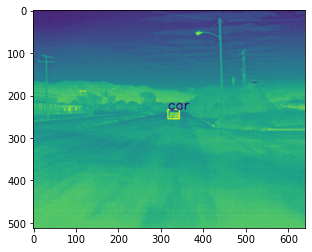

[3, 9, 13, 14, 27, 46, 52, 87, 110, 118, 156, 164, 260, 262, 265, 287, 288, 318, 319, 322, 326, 327, 328, 329, 331, 332, 333, 336, 337, 339, 342, 343, 344, 349, 350, 351, 352, 354, 355, 370, 374, 376, 400, 415, 445, 451, 494, 574, 628, 657, 661, 663, 669, 689, 694, 695, 712, 713, 729, 737, 748, 760, 763, 774, 777, 780, 787, 827, 840, 859, 868, 870, 873, 874, 876, 877, 878, 880, 883, 884, 897, 916, 917, 921, 922, 926, 938, 943, 947, 952, 954, 955, 957, 958, 963, 964, 979, 983, 990, 998, 1009, 1028, 1029, 1031, 1035, 1040, 1041, 1058, 1086, 1129, 1133, 1270, 1292, 1302, 1386, 1387, 1389, 1396, 1449, 1454, 1499, 1508, 1510, 1595, 1618, 1648, 1649, 1650, 1651, 1652, 1653, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,

In [11]:
#import zipfile as zf
#files = zf.ZipFile("FLIR_ADAS_1_3.zip", 'r')
#files.extractall('FLIR')
#files.close()

#!pip install pycocotools --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org

### Choose which data (train/val) to select and store

#domain = 'train/' 
domain ='train/'
import pickle
### Import package

from pycocotools.coco import COCO
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from PIL import Image 
import numpy as np

import os
import numpy as np
import random
# 定义变量
dataroot = 'FLIR_ADAS_1_3' + os.sep

def view_FLIR(ind): #input an image id
    imInfo = coco.imgs[ind]
    annIds = coco.getAnnIds(imgIds=imInfo['id']) #get annotations id of this image
    imgfile = dataroot + domain + imInfo['file_name']

    print(f'{imInfo} \ncorresbonding annids is\n{annIds}\n')

    anns = coco.loadAnns(annIds)#load the annotations information according to the anns id
    if anns:
        print(anns[0]) #show the first annotations

    img = cv2.imread(imgfile,0) #open the image file

    for ann in anns:
        x, y, w, h = ann['bbox']
        cv2.rectangle(img, (x,y), (x + w, y + h), (255,0,0), 2)
        cat = coco.loadCats(ann['category_id'])[0]['name']
        cv2.putText(img, cat, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    plt.imshow(img)
    plt.show()
    
 #if there is one person's height in all annotations of the img i,we save it
def valid_peopleidx(people_index,coco,name):
    result  = []
    for image_id in people_index: #transverse for all images
        annsid = coco.getAnnIds(imgIds = image_id)
        for annid in annsid:# transver all annotations in this image
            ann = coco.loadAnns(ids = annid)
            if ann[0]['category_id'] == 1 and ann[0]['bbox'][3]>120:
                result.append(image_id)
                break
    with open(name, 'wb') as fp:
        pickle.dump(result, fp)
#for i in range(len(result)):
#    FLIR_person_select_index.append(FLIR_person_all[i])

### Load json file

jsonfile = dataroot + domain + 'thermal_annotations.json'
coco = COCO(jsonfile) # coco class to view jsonfile

### View  annotations

cls = 'person'
id = coco.getCatIds(cls)[0]
print(f'{cls} corresponding index is {id}')

cat = coco.loadCats(id)
print(f'{id} corresponding category is {cat}')

print(len(coco.imgs))
print(coco.imgs[0])

### View the specific image

ind = random.randint(0, len(coco.imgs))
view_FLIR(ind)

coco.getCatIds(catNms=['person']) # id number of this category

### Select images contain person

people_index = coco.getImgIds(catIds = [1])
print(people_index)

### Select and save FLIR_people_train/val data

FLIR_person_anns_index = coco.getAnnIds(imgIds = people_index) #get index of anns
FLIR_person_anns= coco.loadAnns(ids = FLIR_person_anns_index) #load anns from index

print(len(FLIR_person_anns))#1205 annotations
print(len(people_index))



TypeError: Image data of dtype object cannot be converted to float

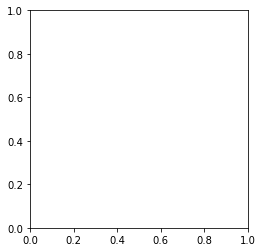

In [13]:
img = cv2.imread('FLIR_people_select\train\images\FLIR_02003.jpeg',0)

In [15]:
print(img)

None


In [10]:

if domain == 'val/':
    valid_peopleidx(people_index,coco,'FLIR_people_select_valIdx')

if domain == 'train/':
    valid_peopleidx(people_index,coco,'FLIR_people_select_trainIdx')

### Save val set index is saved in result with pickle



#with open ('FLIR_people_select_valIdx', 'rb') as fp:
#     FLIR_people_select_valIdx = pickle.load(fp)

### Save training index is saved in result with pickle

#with open('FLIR_people_select_valIdx', 'wb') as fp:
#    pickle.dump(train, fp)

#import pickle
#with open ('FLIR_people_select_trainIdx', 'rb') as fp:
#     FLIR_people_select_trainIdx = pickle.load(fp)

#FLIR_people_select_trainIdx

#import pickle
#with open('FLIR_people_select_valIdx', 'wb') as fp:
#    pickle.dump(result, fp)